In [1]:
import tensorflow as tf

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [3]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

4423680/4422102 [==============================] - 7s 1us/step

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 33s 546us/sample - loss: 0.4756

[1]
1


[array([[ 0.05230124, -0.0932771 , -0.03208701, ..., -0.01229002,
          0.01764662, -0.00197758],
        [ 0.09209317, -0.05193936, -0.00846207, ...,  0.05498318,
         -0.11701091,  0.03325216],
        [ 0.02901729, -0.01408813, -0.05115495, ...,  0.01141254,
         -0.14450388, -0.1120863 ],
        ...,
        [ 0.07516799, -0.05807515, -0.07137492, ...,  0.01456665,
          0.03576433, -0.02072747],
        [ 0.00434412,  0.02771627, -0.1359441 , ..., -0.05543321,
          0.03514606, -0.09671403],
        [ 0.00770387, -0.07383834, -0.05993887, ...,  0.04143324,
          0.07875996,  0.0898765 ]], dtype=float32),
 array([ 0.11373656, -0.01028488,  0.08548107, -0.05724496,  0.01340178,
         0.0211482 ,  0.05217222,  0.18327405, -0.08630251,  0.09119251,
        -0.01569777,  0.03692968,  0.07768443,  0.13743864,  0.20775475,
         0.08156791, -0.09330744, -0.00690296,  0.24106182,  0.12606305,
         0.10226575,  0.12360504,  0.00181822,  0.09325484,  0.007

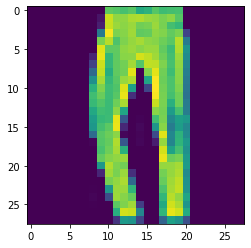

In [12]:
import matplotlib.pyplot as plt
x=5
plt.imshow(test_images[x])
classifications = model.predict(test_images)
print([i for i, j in enumerate(classifications[x]) if j ==   max(classifications[x])])
print(test_labels[x])